In [54]:
import networkx as nx
import numpy as np
from numpy.random import randint
from tqdm import tqdm
import json

In [67]:
num_nodes = 5
num_pd = 9
num_trans_site = 10
num_jobs = 2
max_node_vehicle = 1
max_trans_capacity = 3
flexible = True
same_dest = False

In [68]:
G = nx.MultiDiGraph()
G.add_nodes_from(range(5))
G.add_edge(0, 1, pt=15, capacity=1)
G.add_edge(1, 0, pt=15, capacity=1)
G.add_edge(0, 2, pt=15, capacity=3)
G.add_edge(2, 0, pt=15, capacity=3)
G.add_edge(1, 2, pt=15, capacity=1)
G.add_edge(2, 1, pt=15, capacity=1)
G.add_edge(2, 3, pt=15, capacity=3)
G.add_edge(3, 2, pt=15, capacity=3)
G.add_edge(2, 4, pt=15, capacity=3)
G.add_edge(4, 2, pt=15, capacity=3)

0

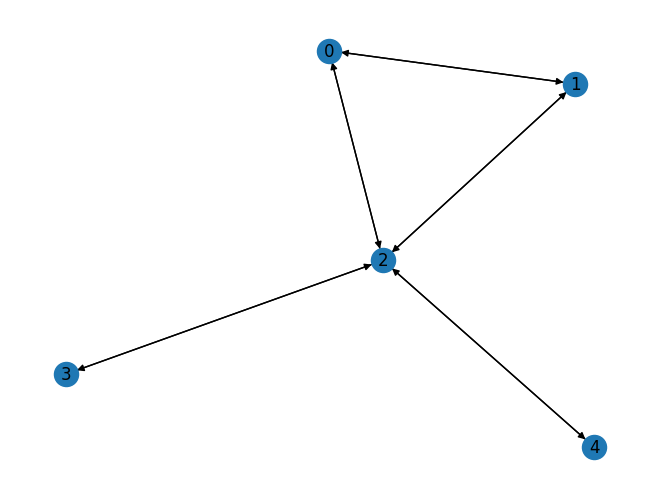

In [69]:
nx.draw(G, with_labels=True)

![!\[\]](<Thesis/Graphics/Layout example (formal).svg>)

In [70]:
node_from_to = [[]]*num_nodes
node_from_to[0] = [[0, 10, 15, 30, 35],
                   [10, 0, 5, 20, 25],
                   [15, 5, 0, 15, 20],
                   [30, 20, 15, 0, 5],
                   [35, 25, 20, 5, 0]]
node_from_to[1] = [[0, 5, 20, 25],
                   [5, 0, 15, 20],
                   [20, 15, 0, 5],
                   [25, 20, 5, 0]]
node_from_to[2] = [[0,  5,  15, 20, 30,  35, 30, 35, 5],
                   [5,  0,  10, 15, 25,  30, 25, 30, 10],
                   [15, 10,  0, 5,  15,  20, 15, 20, 20],
                   [20, 15,  5, 0,  10,  15, 10, 15, 25],
                   [30, 25, 15, 10,  0,   5,  0,  5, 35],
                   [35, 30, 20, 15,  5,   0,  5,  0, 40],
                   [30, 25, 15, 10,  0,   5,  0,  5, 35],
                   [35, 30, 20, 15,  5,   0,  5,  0, 40],
                   [5,  10, 20, 25,  35, 40,  35, 40, 0]
                   ]
node_from_to[3] = [[0, 20, 20],
                   [20, 0, 5],
                   [20, 5, 0]]
node_from_to[4] = [[0, 20, 20],
                   [20, 0, 5],
                   [20, 5, 0]]
# node_from_to += []

In [75]:
"\\".join([" & ".join([str(l) for l in line]) for line in node_from_to[2]])

'0 & 5 & 15 & 20 & 30 & 35 & 30 & 35 & 5\\5 & 0 & 10 & 15 & 25 & 30 & 25 & 30 & 10\\15 & 10 & 0 & 5 & 15 & 20 & 15 & 20 & 20\\20 & 15 & 5 & 0 & 10 & 15 & 10 & 15 & 25\\30 & 25 & 15 & 10 & 0 & 5 & 0 & 5 & 35\\35 & 30 & 20 & 15 & 5 & 0 & 5 & 0 & 40\\30 & 25 & 15 & 10 & 0 & 5 & 0 & 5 & 35\\35 & 30 & 20 & 15 & 5 & 0 & 5 & 0 & 40\\5 & 10 & 20 & 25 & 35 & 40 & 35 & 40 & 0'

In [72]:
node_num_pd = [5,4,9,3,3]

In [73]:
sites = [
    (1, 1, 0, 2, 10, 1),
    (0, 1, 1, 0, 10, 1),
    (0, 3, 2, 6, 10, 3),
    (2, 7, 0, 4, 10, 3),
    (1, 3, 2, 2, 10, 1),
    (2, 3, 1, 2, 10, 1),
    (2, 1, 3, 2, 10, 3),
    (3, 1, 2, 0, 10, 3),
    (2, 5, 4, 2, 10, 3),
    (4, 1, 2, 4, 10, 3)
]
nodes2trans = {
    (0, 1):[(1, 0)],
    (1, 0):[(1, 2)],
    (0, 2):[(3, 6)],
    (2, 0):[(7, 4)],
    (1, 2):[(3, 2)],
    (2, 1):[(3, 2)],
    (2, 3):[(1, 2)],
    (3, 2):[(1, 0)],
    (2, 4):[(5, 2)],
    (4, 2):[(1, 4)]
}


In [74]:
import os
import pprint

FOLDER =f"benchmark/Thesis Example"
os.makedirs(FOLDER, exist_ok=True)
text = json.dumps(nx.node_link_data(G), indent=2)[:-2]+',\n'
num_node_veh = randint(1,max_node_vehicle+1, num_nodes).tolist()


data = {"num_nodes": num_nodes,
        # "num_pd": num_pd, 
        "num_trans_site": num_trans_site, 
        # "num_jobs": num_jobs,
        # "max_node_vehicle": max_node_vehicle,
        # "max_trans_capacity": max_trans_capacity,
        "flexible": flexible,
        }

text += json.dumps(data, indent=2)[1:-2]+',\n'
text += f'  "num_node_veh":\n'+ "\n".join([f"    {line}" for line in pprint.pformat(num_node_veh).split("\n")]) + ",\n"
text += f'  "node_from_to":\n'+ "\n".join([f"    {line}" for line in pprint.pformat(node_from_to).split("\n")]) + ",\n"
text += f'  "trans_sites":\n'+  "\n".join([f"    {line}" for line in pprint.pformat([[s for s in site] for site in sites]).split("\n")])+ ",\n"
# text += f'  "input_nodes":\n'+ "\n".join([f"    {line}" for line in pprint.pformat(input_nodes).split("\n")]) + ",\n"
# text += f'  "output_nodes":\n'+ "\n".join([f"    {line}" for line in pprint.pformat(output_nodes).split("\n")]) + ",\n"
text = text[:-2] + "\n}"
with open(f"{FOLDER}/Network config.json", "w") as f:
        f.write(text)
with open(f"{FOLDER}/Network config.json") as f:
    G_ = nx.node_link_graph(json.loads(f.read()))
    print(f"Graph saved: {'Success!' if nx.utils.graphs_equal(G_, G) else 'Failed!'}")

Graph saved: Success!


# Read

In [63]:
FOLDER =f"benchmark/Thesis Example"
with open(f"{FOLDER}/Network config.json") as f:
    data = json.loads(f.read())
    G = nx.node_link_graph(data)

In [64]:
num_jobs = 2
start_after = randint(0, 1, num_jobs).tolist()
text = '{\n  \"num_jobs\": ' + f"{num_jobs},\n"
text += f'  "start_after":\n'+  "\n".join([f"    {line}" for line in pprint.pformat(start_after).split("\n")])+ ",\n"
text += '  "jobs\": {\n'
ops0 = [[[0,0,1],[1,0,3],[2,2,1],[3,2,0]],
        [[0,0,3],[2,6,1],[3,2,0]]]
ops1 = [[[2,8,5],[4,2,0]],
        [[2,8,3],[1,2,1],[0,2,3],[2,6,5],[4,2,0]]]
text += f'    "job {0}":\n' + "\n".join([f"        {line}" for line in pprint.pformat(ops0, width=20).split("\n")]) + ",\n"
text += f'    "job {1}":\n' + "\n".join([f"        {line}" for line in pprint.pformat(ops1, width=20).split("\n")])

text += "  }\n}"

In [65]:
with open(f"{FOLDER}/{'Flexible ' if flexible else ''}J{num_jobs}.json", "w") as f:
        f.write(text)

In [66]:
num_jobs = 5
text = '{\n  \"num_jobs\": ' + f"{num_jobs},\n  " +  '"jobs\": {\n'
data["jobs"] = {}
sample_paths_db = {}

if same_dest:
    fr = np.random.choice(data["input_nodes"], 1)[0]
    to = np.random.choice(data["output_nodes"], 1)[0]
    # while to == fr:
    #     to = randint(0,len(G.nodes))
    sample_paths = []
    g = nx.all_simple_paths(G, fr, to)
    for _ in range(10):
        try:
            sample_paths += next(g),
        except StopIteration:
            break
    # num_path = 3

for j in range(num_jobs):
    num_path = randint(1,4) if flexible else 1
    if not same_dest:
        fr = np.random.choice(data["input_nodes"], 1)[0]
        to = np.random.choice(data["output_nodes"], 1)[0]
        # while to == fr:
        #     to = randint(0,len(G.nodes))
    
        # if num_path == 1:
        #     paths = [nx.shortest_path(G, fr, to)]
        # else:
        if (fr,to) in sample_paths_db:
            sample_paths = sample_paths_db[(fr,to)]
        else:
            sample_paths = []
            g = nx.all_simple_paths(G, fr, to)
            for _ in range(10):
                try:
                    sample_paths += next(g),
                except StopIteration:
                    break
            assert len(sample_paths) != 0
            sample_paths_db[(fr,to)] = sample_paths
        indices = np.random.choice(range(len(sample_paths)), num_path if len(sample_paths) > num_path else len(sample_paths), replace=False)
        paths = [sample_paths[i] for i in indices]
    else:
        indices = np.random.choice(range(len(sample_paths)), num_path if len(sample_paths) > num_path else len(sample_paths), replace=False)
        paths = [sample_paths[i] for i in indices]

    all_ops = []
    start_pd = 0
    # start_pd = randint(num_pd)
    end_pd = 0
    # end_pd = randint(num_pd)
    for path in paths:
        ops = [[n] for n in path]
    # print(ops)
        for i in range(1, len(path)):
            if i == 1:
                ops[0] += start_pd,
            fr,to = nodes2trans[(path[i-1],path[i])]
            ops[i-1] += fr,
            ops[i] += to,
            if i == len(path)-1:
                ops[i] += end_pd,
        all_ops += ops,
    text += f'    "job {j}":\n' + "\n".join([f"        {line}" for line in pprint.pformat(all_ops, width=20).split("\n")])
    if j == num_jobs -1:
        text +='\n'
    else: 
        text +=',\n' 

    data["jobs"][f"job {j}"] = all_ops
text += "  }\n}"

KeyError: 'input_nodes'

In [5]:
trans_sites = []
for node in range(num_nodes):
    trans_sites += np.random.choice(num_pd, G.degree[node], replace=False).tolist(),

nodes2trans = {}
sites = []
for edge in G.edges:
    from_pd = trans_sites[edge[0]].pop()
    to_pd = trans_sites[edge[1]].pop()
    edge_data = G.get_edge_data(edge[0],edge[1])
    sites += (edge[0],from_pd, edge[1],to_pd, edge_data["weight"], edge_data["capacity"]),
    nodes2trans[(edge[0], edge[1])] = (from_pd,to_pd)
    nodes2trans[(edge[1], edge[0])] = (to_pd,from_pd)

In [2]:
num_nodes = 4
num_pd = 5
num_trans_site = 20
num_jobs = 20
max_node_vehicle = 3
max_trans_capacity = 3
flexible = True
same_dest = False

[2, 10] [5, 7]


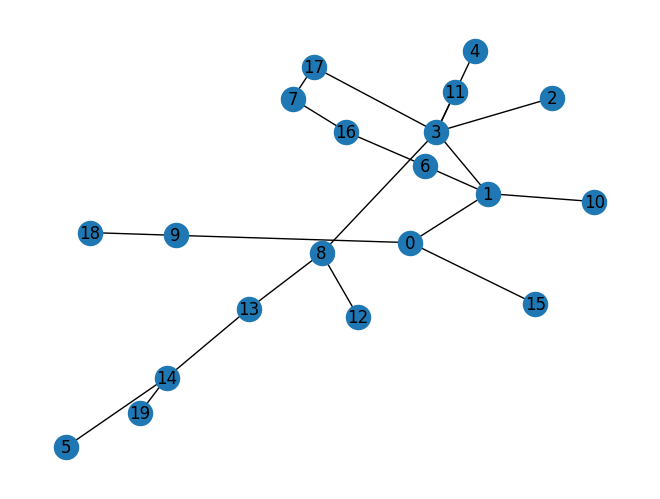

In [3]:
from itertools import combinations
trans_count = num_trans_site

num_io_nodes = int(num_nodes*0.1) if int(num_nodes*0.1) > 0 else 1
input_nodes, output_nodes = np.random.choice(num_nodes, num_io_nodes*2, replace=False).reshape(2,-1)
input_nodes, output_nodes = input_nodes.tolist(), output_nodes.tolist()
print(input_nodes,output_nodes)
inter_nodes = list(range(num_nodes))
for i in input_nodes+output_nodes:
    inter_nodes.remove(i)

G = nx.Graph()
G.add_node(inter_nodes[0])

for i in inter_nodes[1:]:
    existing_nodes = list(G.nodes)
    node = randint(0,len(existing_nodes))

    while G.degree[existing_nodes[node]] +1 > num_pd:
        node = randint(0,len(existing_nodes))
    G.add_node(i)
    G.add_edge(i, existing_nodes[node], weight=randint(1,10), capacity=randint(0,max_trans_capacity)+1)
    trans_count -= 1

for i in input_nodes + output_nodes:
    G.add_node(i)


for i in input_nodes:
    np.random.shuffle(inter_nodes)
    for node in inter_nodes:
        if G.degree[node] +1 > num_pd:
            continue
        if G.has_edge(i,node):
            continue
        G.add_edge(i, node, weight=randint(1,10), capacity=randint(0,max_trans_capacity)+1)
        trans_count -= 1
        break

for i in output_nodes:
    np.random.shuffle(inter_nodes)
    for node in inter_nodes:
        if G.degree[node] +1 > num_pd:
            continue
        if G.has_edge(i,node):
            continue
        G.add_edge(i, node, weight=randint(1,10), capacity=randint(0,max_trans_capacity)+1)
        trans_count -= 1
        break

nodes = list(G.nodes)
node_pair = list(combinations(nodes, 2))
np.random.shuffle(node_pair)

for pair in node_pair:
    f, t = pair
    if f in input_nodes and t in input_nodes:
        continue
    if f in output_nodes and t in output_nodes:
        continue
    if G.degree[f] + 1 > num_pd or G.degree[t] +1 > num_pd:
        continue
    if G.has_edge(f,t):
        continue
    else:
        G.add_edge(f,t, weight=randint(1,10), capacity=randint(0,max_trans_capacity)+1)
        trans_count -= 1
    if trans_count == 0:
        break

for node in G.nodes:
    assert G.degree[node] != 0
    
nx.draw(G, with_labels = True)

[2, 10] [5, 7]


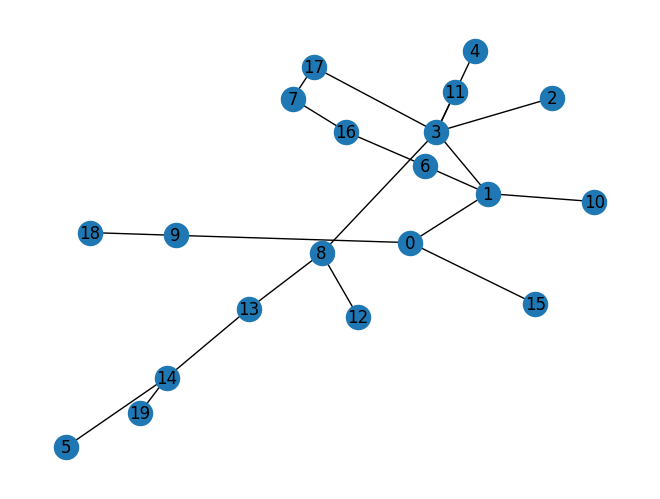

In [ ]:
from itertools import combinations
trans_count = num_trans_site

num_io_nodes = int(num_nodes*0.1) if int(num_nodes*0.1) > 0 else 1
input_nodes, output_nodes = np.random.choice(num_nodes, num_io_nodes*2, replace=False).reshape(2,-1)
input_nodes, output_nodes = input_nodes.tolist(), output_nodes.tolist()
print(input_nodes,output_nodes)
inter_nodes = list(range(num_nodes))
for i in input_nodes+output_nodes:
    inter_nodes.remove(i)

G = nx.Graph()
G.add_node(inter_nodes[0])

for i in inter_nodes[1:]:
    existing_nodes = list(G.nodes)
    node = randint(0,len(existing_nodes))

    while G.degree[existing_nodes[node]] +1 > num_pd:
        node = randint(0,len(existing_nodes))
    G.add_node(i)
    G.add_edge(i, existing_nodes[node], weight=randint(1,10), capacity=randint(0,max_trans_capacity)+1)
    trans_count -= 1

for i in input_nodes + output_nodes:
    G.add_node(i)


for i in input_nodes:
    np.random.shuffle(inter_nodes)
    for node in inter_nodes:
        if G.degree[node] +1 > num_pd:
            continue
        if G.has_edge(i,node):
            continue
        G.add_edge(i, node, weight=randint(1,10), capacity=randint(0,max_trans_capacity)+1)
        trans_count -= 1
        break

for i in output_nodes:
    np.random.shuffle(inter_nodes)
    for node in inter_nodes:
        if G.degree[node] +1 > num_pd:
            continue
        if G.has_edge(i,node):
            continue
        G.add_edge(i, node, weight=randint(1,10), capacity=randint(0,max_trans_capacity)+1)
        trans_count -= 1
        break

nodes = list(G.nodes)
node_pair = list(combinations(nodes, 2))
np.random.shuffle(node_pair)

for pair in node_pair:
    f, t = pair
    if f in input_nodes and t in input_nodes:
        continue
    if f in output_nodes and t in output_nodes:
        continue
    if G.degree[f] + 1 > num_pd or G.degree[t] +1 > num_pd:
        continue
    if G.has_edge(f,t):
        continue
    else:
        G.add_edge(f,t, weight=randint(1,10), capacity=randint(0,max_trans_capacity)+1)
        trans_count -= 1
    if trans_count == 0:
        break

for node in G.nodes:
    assert G.degree[node] != 0
    
nx.draw(G, with_labels = True)

In [4]:
node_from_to = randint(1,10, (num_nodes, num_pd, num_pd))
for i in range(num_pd):
    node_from_to[:,i,i] = 0

In [6]:
import os
import pprint

FOLDER =f"benchmark/Network N{num_nodes}T{num_trans_site}C{max_trans_capacity}V{max_node_vehicle}"
os.makedirs(FOLDER, exist_ok=True)
text = json.dumps(nx.node_link_data(G), indent=2)[:-2]+',\n'
num_node_veh = randint(1,max_node_vehicle+1, num_nodes).tolist()

data = {"num_nodes": num_nodes,
        "num_pd": num_pd, 
        "num_trans_site": num_trans_site, 
        # "num_jobs": num_jobs,
        "max_node_vehicle": max_node_vehicle,
        "max_trans_capacity": max_trans_capacity,
        "flexible": flexible,
        }

text += json.dumps(data, indent=2)[1:-2]+',\n'
text += f'  "num_node_veh":\n'+ "\n".join([f"    {line}" for line in pprint.pformat(num_node_veh).split("\n")]) + ",\n"
text += f'  "node_from_to":\n'+ "\n".join([f"    {line}" for line in pprint.pformat(node_from_to.tolist()).split("\n")]) + ",\n"
text += f'  "trans_sites":\n'+  "\n".join([f"    {line}" for line in pprint.pformat([[s for s in site] for site in sites]).split("\n")])+ ",\n"
text += f'  "input_nodes":\n'+ "\n".join([f"    {line}" for line in pprint.pformat(input_nodes).split("\n")]) + ",\n"
text += f'  "output_nodes":\n'+ "\n".join([f"    {line}" for line in pprint.pformat(output_nodes).split("\n")]) + ",\n"
text = text[:-2] + "\n}"
with open(f"{FOLDER}/Network config.json", "w") as f:
        f.write(text)
with open(f"{FOLDER}/Network config.json") as f:
    G_ = nx.node_link_graph(json.loads(f.read()))
    print(f"Graph saved: {'Success!' if nx.utils.graphs_equal(G_, G) else 'Failed!'}")

Graph saved: Success!


## Read

In [7]:
FOLDER =f"benchmark/Network N{num_nodes}T{num_trans_site}C{max_trans_capacity}V{max_node_vehicle}"
with open(f"{FOLDER}/Network config.json") as f:
    data = json.loads(f.read())
    G = nx.node_link_graph(data)

In [8]:
# import pprint
# data = ({"num_nodes": num_nodes,
#         "num_pd": num_pd, 
#         "num_trans_site": num_trans_site, 
#         # "num_jobs": num_jobs,
#         "max_node_vehicle": max_node_vehicle,
#         "max_trans_capacity": max_trans_capacity,
#         "flexible": flexible,
#         })

# text = json.dumps(data, indent=2)[:-2]+',\n'
# num_node_veh = randint(1,max_node_vehicle+1, num_nodes).tolist()
# text += f'  "num_node_veh":\n'+ "\n".join([f"    {line}" for line in pprint.pformat(num_node_veh).split("\n")]) + ",\n"
# text += f'  "node_from_to":\n'+ "\n".join([f"    {line}" for line in pprint.pformat(node_from_to.tolist()).split("\n")]) + ",\n"
# text += f'  "trans_sites":\n'+  "\n".join([f"    {line}" for line in pprint.pformat([[s for s in site] for site in sites]).split("\n")])+ ",\n"
# data["num_node_veh"] = num_node_veh
# data["node_from_to"] = node_from_to.tolist()
# data["trans_sites"] = [[s for s in site] for site in sites]

In [12]:
num_jobs = 5
text = '{\n  \"num_jobs\": ' + f"{num_jobs},\n  " +  '"jobs\": {\n'
data["jobs"] = {}
sample_paths_db = {}

if same_dest:
    fr = np.random.choice(data["input_nodes"], 1)[0]
    to = np.random.choice(data["output_nodes"], 1)[0]
    # while to == fr:
    #     to = randint(0,len(G.nodes))
    sample_paths = []
    g = nx.all_simple_paths(G, fr, to)
    for _ in range(10):
        try:
            sample_paths += next(g),
        except StopIteration:
            break
    # num_path = 3

for j in range(num_jobs):
    num_path = randint(1,4) if flexible else 1
    if not same_dest:
        fr = np.random.choice(data["input_nodes"], 1)[0]
        to = np.random.choice(data["output_nodes"], 1)[0]
        # while to == fr:
        #     to = randint(0,len(G.nodes))
    
        # if num_path == 1:
        #     paths = [nx.shortest_path(G, fr, to)]
        # else:
        if (fr,to) in sample_paths_db:
            sample_paths = sample_paths_db[(fr,to)]
        else:
            sample_paths = []
            g = nx.all_simple_paths(G, fr, to)
            for _ in range(10):
                try:
                    sample_paths += next(g),
                except StopIteration:
                    break
            assert len(sample_paths) != 0
            sample_paths_db[(fr,to)] = sample_paths
        indices = np.random.choice(range(len(sample_paths)), num_path if len(sample_paths) > num_path else len(sample_paths), replace=False)
        paths = [sample_paths[i] for i in indices]
    else:
        indices = np.random.choice(range(len(sample_paths)), num_path if len(sample_paths) > num_path else len(sample_paths), replace=False)
        paths = [sample_paths[i] for i in indices]

    all_ops = []
    start_pd = 0
    # start_pd = randint(num_pd)
    end_pd = 0
    # end_pd = randint(num_pd)
    for path in paths:
        ops = [[n] for n in path]
    # print(ops)
        for i in range(1, len(path)):
            if i == 1:
                ops[0] += start_pd,
            fr,to = nodes2trans[(path[i-1],path[i])]
            ops[i-1] += fr,
            ops[i] += to,
            if i == len(path)-1:
                ops[i] += end_pd,
        all_ops += ops,
    text += f'    "job {j}":\n' + "\n".join([f"        {line}" for line in pprint.pformat(all_ops, width=20).split("\n")])
    if j == num_jobs -1:
        text +='\n'
    else: 
        text +=',\n' 

    data["jobs"][f"job {j}"] = all_ops
text += "  }\n}"

In [13]:
with open(f"{FOLDER}/{'Flexible ' if flexible else ''}J{num_jobs}.json", "w") as f:
        f.write(text)
# with open(f"benchmark/{'Flexible ' if flexible else ''}N{num_nodes}T{num_trans_site}V{max_node_vehicle}C{max_trans_capacity}J{num_jobs}.json", "w") as f:
#         f.write(text)

In [11]:
# with open(f"benchmark/{'Flexible ' if flexible else ''}N{num_nodes}T{num_trans_site}V{max_node_vehicle}C{max_trans_capacity}J{num_jobs}.json") as f:
#     d = json.loads(f.read())
#     print("Validation: " "Success!" if d == data else "Failed!")